In [13]:
%%bash
cd /home/matti/DATA/Mayonese/staggered_run/SST_statistic/
rsync -azuP grouch:/data/storage19/mattia/programming/lbe-direct/src/tests/SCMP_SHEAR_MAYO_STAGGERED/shear_stress_tensor_components_aveXY.dat .
./process.sh

receiving incremental file list


/tmp/ipykernel_9509/2907274212.py:60: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  plt.plot([], [], ' ',linestyle='--', color='black', label=r'Average $SST_{%s}$ along the gap'%comp)


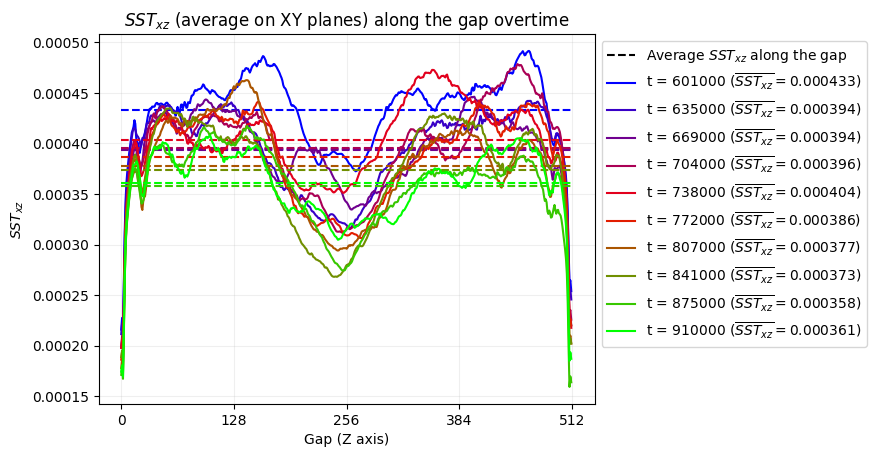

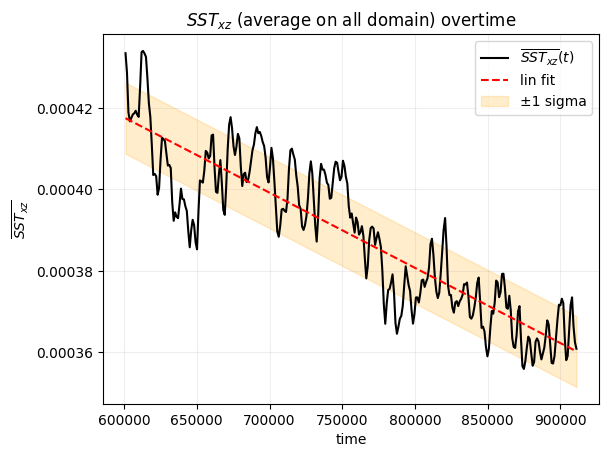

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import tkinter as tk
from tkinter import messagebox

save_dir = "/home/matti/Pictures/images_sst_time/"

direc = "/home/matti/DATA/Mayonese/staggered_run/SST_statistic/"
with open(direc+"sst_xx.dat", 'r') as f:
    SSTxx = np.loadtxt(f)
with open(direc+"sst_xy.dat", 'r') as f:
    SSTxy = np.loadtxt(f)
with open(direc+"sst_xz.dat", 'r') as f:
    SSTxz = np.loadtxt(f)
with open(direc+"sst_yy.dat", 'r') as f:
    SSTyy = np.loadtxt(f)
with open(direc+"sst_yz.dat", 'r') as f:
    SSTyz = np.loadtxt(f)
with open(direc+"sst_zz.dat", 'r') as f:
    SSTzz = np.loadtxt(f)
    
#col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
num = 10
col = [cm.brg(i/(num-1)) for i in range(num)]

## custom color map
if 0:
    rgb_colors = [(0,0,1), (0,1,0), (1,0,0)]
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", rgb_colors, N=256)
    gradient = np.linspace(0, 1, 256).reshape(1, 256)
    plt.imshow(gradient, aspect=10, cmap=custom_cmap)
    plt.axis('off')
    plt.title("Custom Colormap Preview")
    plt.show()
    col = [custom_cmap(i/(num-1)) for i in range(num)]

def func_from_fit(points, N, deg, X):
    par, residuals, rank, singular_values, rcond = np.polyfit(X, points, deg, rcond=None, full=True, w=None, cov=False)
    sigma=np.sqrt(residuals/(N-(deg+1)))
    fitpolyn = np.zeros_like(X, dtype=float)
    for i, coef in enumerate(par):
        fitpolyn += coef * X**(deg-i)
    return fitpolyn, sigma

def pplot(SST, comp):
    off = 601000
    dt  = 1000
    N   = len(SST[:,0])
    p   = 1 # number of degree of the polynome (that is, number of parameters for the fit - 1)
    pl  = np.linspace(0,N-1,num, dtype=int)
    T   = np.linspace(off,off+dt*N,N)
    aveSST = np.average(SST[:,:],axis=1)
    polyn, sigma = func_from_fit(aveSST, N, p, T)
    
    plt.figure(1)
    plt.plot([], [], ' ',linestyle='--', color='black', label=r'Average $SST_{%s}$ along the gap'%comp)
    i=0
    for j in pl:
        plt.plot(SST[j,:], color=col[i], label=r"t = %d ($\overline{SST_{%s}}=%f$)"%(j*dt+off,comp,aveSST[j]))
        plt.hlines(aveSST[j], 0, 512, color=col[i], linestyle='--')
        i += 1
    plt.xlabel("Gap (Z axis)")
    plt.ylabel(r"$SST_{%s}$"%comp)
    plt.xticks([0,128,256,128+256,512])
    plt.title(r"$SST_{%s}$ (average on XY planes) along the gap overtime"%comp)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.grid(alpha=0.2)
    plt.savefig(save_dir+"SST_gap_profiles_in_time.png", bbox_inches='tight', dpi=300, format='png')
    
    plt.figure(2)
    plt.plot(T, aveSST, color='black', label=r"$\overline{SST_{%s}}(t)$"%comp)
    plt.plot(T, polyn, color='red', linestyle='--', label='lin fit')
    plt.fill_between(T, polyn+sigma, polyn-sigma, color='orange', alpha=0.2, label='±1 sigma')
    # plt.fill_between(T, polyn+sigma, polyn+2*sigma, color='yellow', alpha=0.2, label='±2 sigma')
    # plt.fill_between(T, polyn-sigma, polyn-2*sigma, color='yellow', alpha=0.2)

    plt.xlabel("time")
    plt.ylabel(r"$\overline{SST_{%s}}$"%comp)
    plt.title(r"$SST_{%s}$ (average on all domain) overtime"%comp)
    plt.legend()
    plt.grid(alpha=0.2)
    plt.savefig(save_dir+"SST_evolution_in_time.png", bbox_inches='tight', dpi=300, format='png')

## choose which component to plot interactivelly
if 0:
    options = {'xx':SSTxx, 'xy':SSTxy, 'xz':SSTxz, 'yy':SSTyy, 'yz':SSTyz, 'zz':SSTzz}
    # Function to show the selected option in a popup
    def show_selection():
        selected_option = selected.get()
        # messagebox.showinfo("Your Selection", f"You selected: {selected_option}")
        pplot(options[selected_option],selected_option)
        root.destroy()  # Close the window
    # Create main window
    root = tk.Tk()
    root.title("Choose an component of the SST")
    root.geometry("400x300")
    # Variable to store selected option
    selected = tk.StringVar(value="None")
    # Widgets
    tk.Label(root, text="Please select an option:").pack(pady=10)
    for i,case in enumerate(options):
        tk.Radiobutton(root, text=case, variable=selected, value=case).pack(anchor='c')
    tk.Button(root, text="Submit", command=show_selection).pack(pady=15)
    # Start the GUI loop
    root.mainloop()

# pplot(SSTxx,"xx")
# pplot(SSTxy,"xy")
pplot(SSTxz,"xz") # <---------------------
# pplot(SSTyy,"yy")
# pplot(SSTyz,"yz")
# pplot(SSTzz,"zz")